In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


2024-06-12 21:39:17.491393: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 21:39:17.491515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 21:39:17.624995: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.6456 - loss: 1.0828 - val_accuracy: 0.9589 - val_loss: 0.1451
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.9358 - loss: 0.2093 - val_accuracy: 0.9726 - val_loss: 0.0903
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9547 - loss: 0.1494 - val_accuracy: 0.9795 - val_loss: 0.0671
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.9663 - loss: 0.1148 - val_accuracy: 0.9806 - val_loss: 0.0584
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9698 - loss: 0.0992 - val_accuracy: 0.9845 - val_loss: 0.0498
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.9739 - loss: 0.0879 - val_accuracy: 0.9852 - val_loss: 0.0452
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.9761 - loss: 0.0760 - val_accuracy: 0.9863 - val_loss: 0.0442
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.9801 - loss: 0.0673 - 

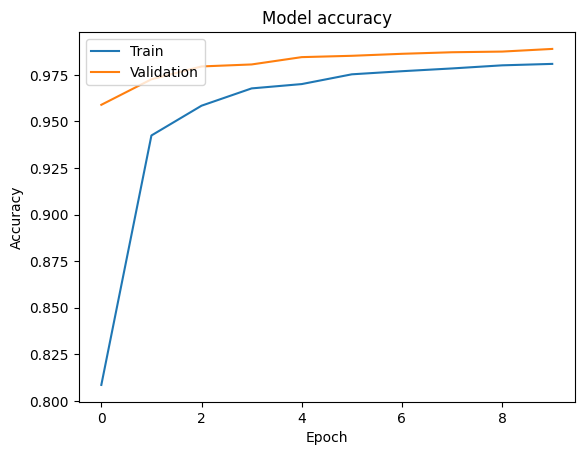

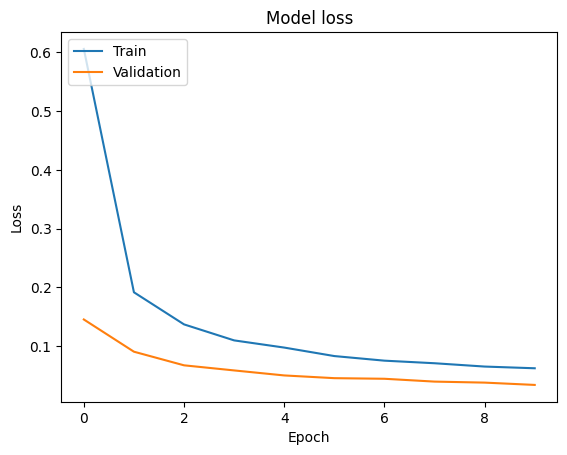

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Submission file has been saved.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

# File paths
train_path = '/kaggle/input/digit-recognizer/train.csv'
test_path = '/kaggle/input/digit-recognizer/test.csv'
submission_path = '/kaggle/input/digit-recognizer/sample_submission.csv'

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)

# Split train data into features and target
X = train_df.drop(columns=['label'])
y = train_df['label']

# Normalize the data
X = X / 255.0
test_df = test_df / 255.0

# Reshape the data to fit the model
X = X.values.reshape(-1, 28, 28, 1)
test_df = test_df.values.reshape(-1, 28, 28, 1)

# One-hot encode the target variable
y = to_categorical(y)

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict on the test set
test_predictions = model.predict(test_df)
test_predictions = np.argmax(test_predictions, axis=1)

# Prepare the submission dataframe
submission_df['Label'] = test_predictions

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

print("Submission file has been saved.")
